<a href="https://colab.research.google.com/github/kiranch97/Machine-Learning-Algorithms-for-Beginner-s/blob/main/Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Quality Prediction - Machine Learning**

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

## **Load the Dataset**

In [2]:
# Load the dataset
df = pd.read_csv('winequalityN.csv')

In [3]:
# Check dataset statistics
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.216579,1.295751,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339691,0.164548,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318722,0.145231,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.444326,4.757392,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056042,0.035031,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218395,0.160637,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531215,0.148768,0.22000,0.43000,0.51000,0.60000,2.00000


In [20]:
df.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


In [21]:
df['type'].unique()

array(['white', 'red'], dtype=object)

## **EDA *Exploratory* Data Analysis**

In [15]:

df.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


In [22]:

for col in df.columns:
  if df[col].isnull().sum() > 0:
    df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()


0

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

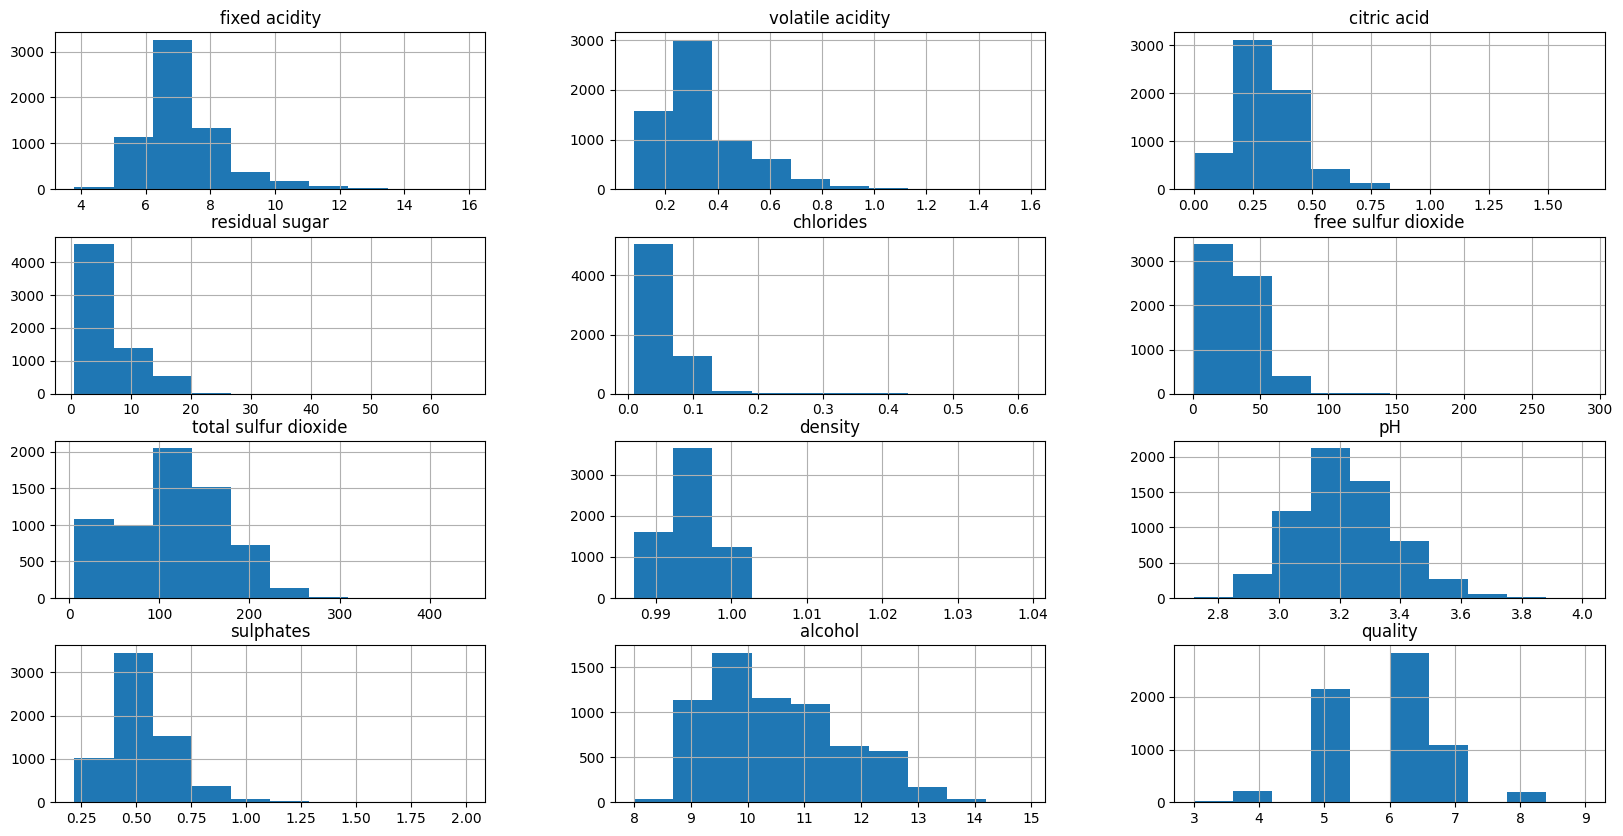

In [23]:
df.hist(figsize=(20, 10))

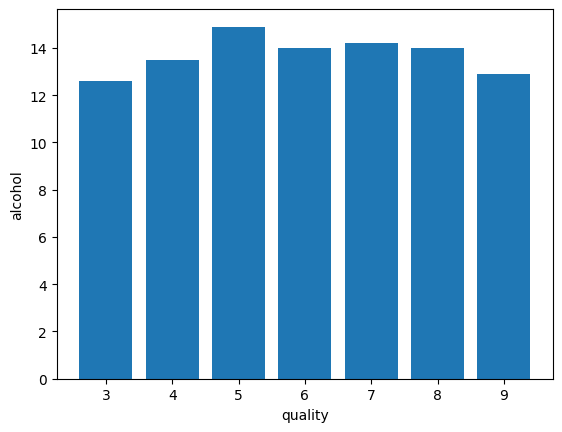

In [24]:


plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()


In [26]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()


ValueError: could not convert string to float: 'white'

<Figure size 1200x1200 with 0 Axes>

In [27]:
print(df.dtypes)

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [31]:
df1 = pd.get_dummies(df['type'])

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   red     6497 non-null   bool 
 1   white   6497 non-null   bool 
dtypes: bool(2)
memory usage: 12.8 KB


In [33]:
df = pd.concat([df, df1], axis=1).reindex(df.index)

In [34]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False,True
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False,True
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False,True
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False,True
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False,True


In [43]:
df['red'] = df['red'].astype(int)
df['white'] = df['white'].astype(int)


In [44]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1


In [45]:
df.drop('type', axis=1, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red                   6497 non-null   int64  
 13  white                 6497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 710.7 KB


In [48]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
fixed acidity,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967,0.486913,-0.486913
volatile acidity,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838,0.652606,-0.652606
citric acid,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699,-0.187073,0.187073
residual sugar,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819,-0.348982,0.348982
chlorides,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818,0.512596,-0.512596
free sulfur dioxide,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463,-0.471644,0.471644
total sulfur dioxide,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385,-0.700357,0.700357
density,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858,0.390645,-0.390645
pH,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356,0.328514,-0.328514
sulphates,0.300225,0.225313,0.057564,-0.185716,0.395073,-0.188471,-0.275291,0.259432,0.191075,1.000000,-0.003261,0.038713,0.486662,-0.486662


<Axes: >

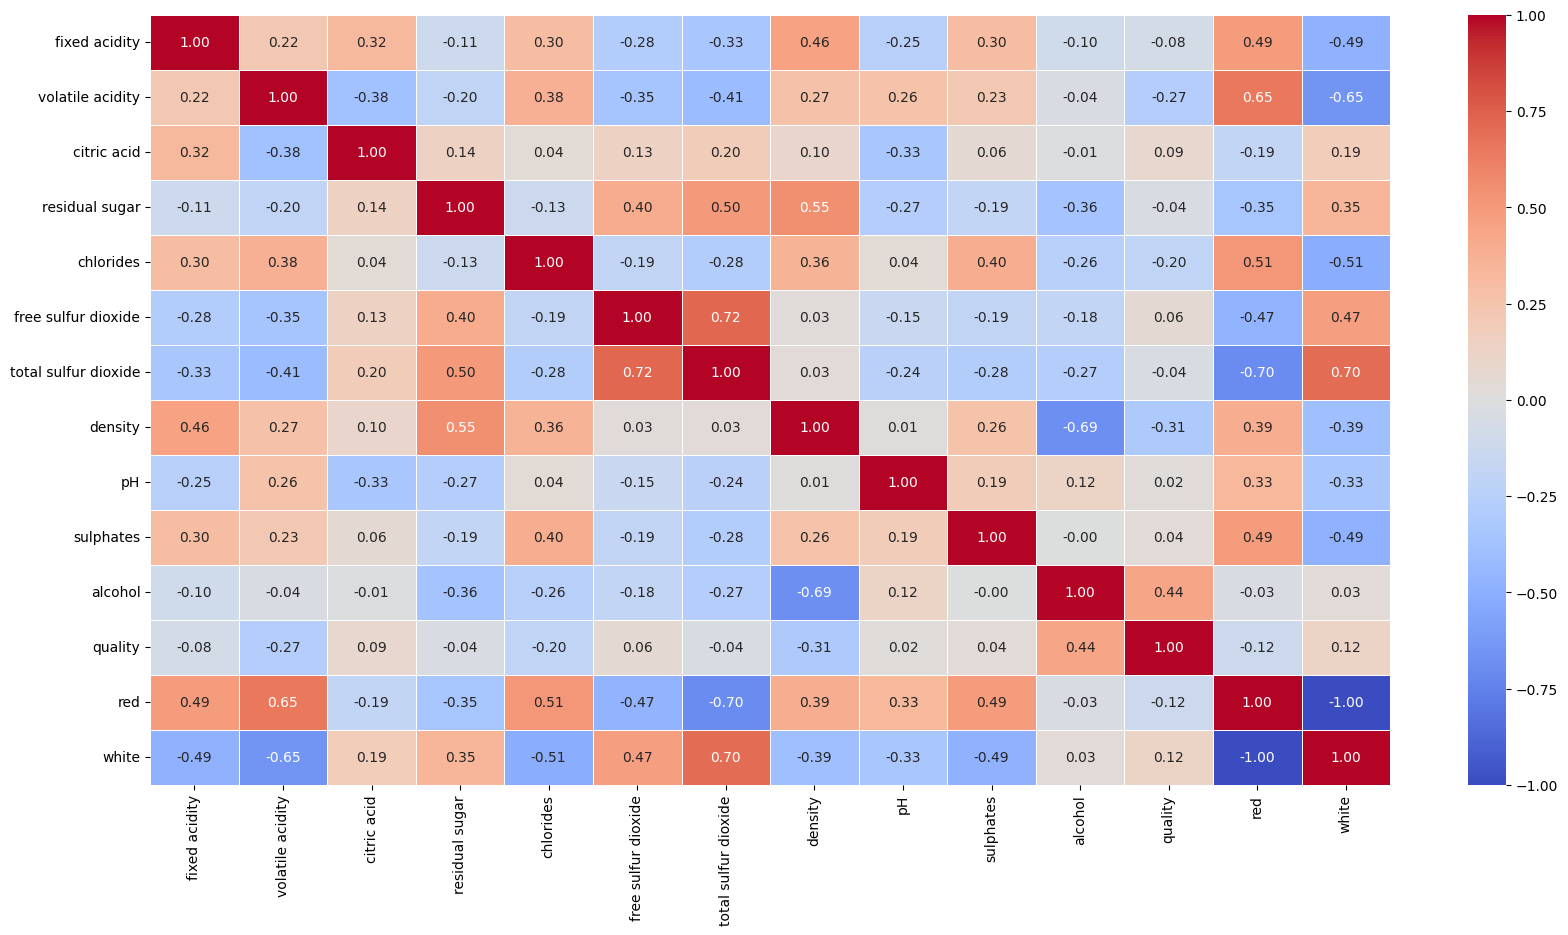

In [49]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True,  cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [50]:
df.quality.unique() #array([6, 5, 7, 8, 4, 3, 9])

array([6, 5, 7, 8, 4, 3, 9])

In [51]:
df['best quality'] = [1 if x > 5 else 0 for x in df['quality']]

In [52]:
df = df.drop(columns='quality')

In [53]:
y = df['best quality']
X = df.drop(columns='best quality')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  red                   6497 non-null   int64  
 12  white                 6497 non-null   int64  
 13  best quality          6497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 710.7 KB


## **Data Pre-processing**

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89)

X_train.shape, X_test.shape # (5197, 12), (1300, 12))

((5197, 13), (1300, 13))

In [56]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.fit_transform(X_test)

In [59]:
X_train

array([[0.29661017, 0.10666667, 0.39      , ..., 0.09677419, 0.        ,
        1.        ],
       [0.22033898, 0.28      , 0.2       , ..., 0.19354839, 0.        ,
        1.        ],
       [0.38135593, 0.13333333, 0.48      , ..., 0.70967742, 1.        ,
        0.        ],
       ...,
       [0.28813559, 0.24666667, 0.15      , ..., 0.30645161, 1.        ,
        0.        ],
       [0.22881356, 0.13333333, 0.33      , ..., 0.27419355, 0.        ,
        1.        ],
       [0.55932203, 0.29333333, 0.45      , ..., 0.5483871 , 1.        ,
        0.        ]])

## **Model Creation**

In [60]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

lr_prediction = lr_model.predict(X_test)


In [61]:
from sklearn.metrics import accuracy_score

lr_prediction

lr_accuracy = accuracy_score(y_test, lr_prediction)
lr_accuracy # 0.7453846153846154 (Not Bad!)

0.7453846153846154

In [62]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(X_train, y_train)

XGB_prediction = XGB_model.predict(X_test)
XGB_prediction


array([1, 0, 1, ..., 0, 0, 1])

In [63]:
XGB_accuracy = accuracy_score(y_test, XGB_prediction)

XGB_accuracy # 0.6746153846153846

0.6746153846153846

In [64]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(X_train, y_train)
svc_prediction = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_prediction)

svc_accuracy # 0.7407692307692307

0.7469230769230769